## Convolution Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Example from class: h[n] = 1 for -2 $\le$ n $\le$ 3,   
                    x[n] = [1, 1/2]

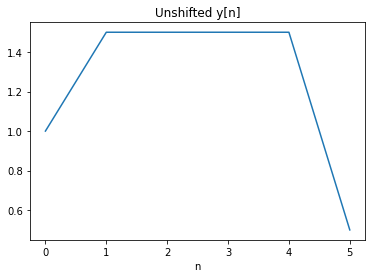

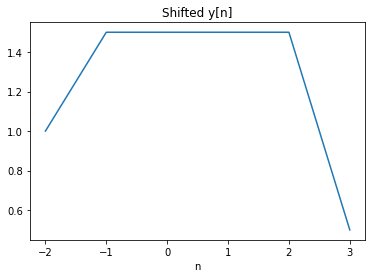

In [2]:
h = np.ones(5)
x = np.array([1,0.5])

np.convolve(h,x)
plt.plot(np.convolve(h,x))
plt.xlabel('n')
plt.title('Unshifted y[n]')
plt.show()

# For leftward shifts (forwarding), we can perform the convolution, and them shift the time axis

n = np.array(range(len(np.convolve(h,x)))) - 2
plt.plot(n, np.convolve(h,x))
plt.xlabel('n')
plt.title('Shifted y[n]')
plt.show()

In [3]:
print('Length of h[n]:', len(h))
print('Length of x[n]:', len(x))
print('Length of h[n]*x[n]:', len(np.convolve(h,x)))

Length of h[n]: 5
Length of x[n]: 2
Length of h[n]*x[n]: 6


Example from class: h[n] = 1 for 2 $\le$ n $\le$ 7,   
                    x[n] = [1, 1/2]

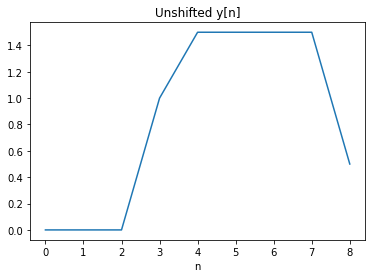

In [4]:
# For a right shift, we can also pad zeros

h = np.concatenate([np.zeros(3),np.ones(5)])
x = np.array([1,0.5])

np.convolve(h,x)
plt.plot(np.convolve(h,x))
plt.xlabel('n')
plt.title('Unshifted y[n]')
plt.show()

# But the number of samples does change

Convolution of two rects:

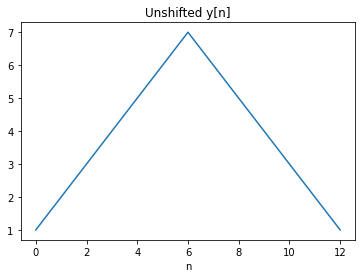

In [5]:
x = np.ones(7)
h = np.ones(7)

np.convolve(h,x)
plt.plot(np.convolve(h,x))
plt.xlabel('n')
plt.title('Unshifted y[n]')
plt.show()

### Properties:

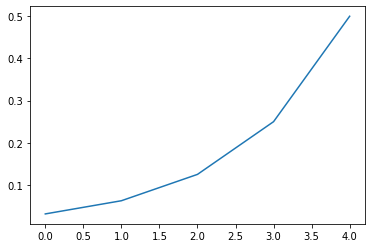

In [8]:
plt.plot(h)

In [6]:
# Associativity


x = range(5)
f = np.array([(1/2)**n for n in x])

g = np.ones(6)

x = range(5, 0, -1)
h =  np.array([(1/2)**n for n in x])

np.convolve(np.convolve(f, g), h) == np.convolve(f , np.convolve(g, h))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [9]:
# Distributivity 

# Right shift
h = np.concatenate([np.zeros(3), h])

max_length = max(len(f), len(g), len(h))

f = np.pad(f, (0,max_length-len(f)))
g = np.pad(g, (0,max_length-len(g)))
h = np.pad(h, (0,max_length-len(h)))


np.array_equal(np.convolve(f, (g+h)), np.convolve(f, g) + np.convolve(f, h))

True

In [10]:
# Identity

x = range(5)
f = np.array([(1/2)**n for n in x])
delta = np.ones(1)

np.array_equal(f, np.convolve(f, delta))

True

Phase response example:

In [11]:
omega = np.linspace(-3*np.pi, 3*np.pi, 100)

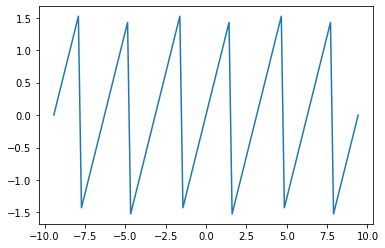

In [12]:
plt.plot(omega,np.arctan(np.tan(omega)))

Frequency response example:

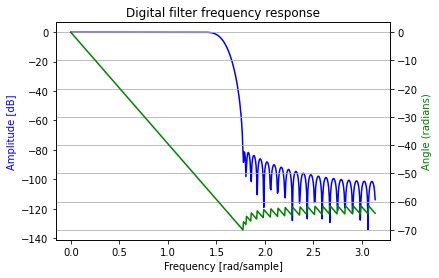

In [28]:
b = signal.firwin(80, 0.5, window=('kaiser', 8))
w, h = signal.freqz(b)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

In [14]:
print('Frequency:', w[128])

print('Frequency response:', h[128])

Phase: 0.7853981633974483
Frequency response: (0.9238827495922644+0.3826847649236619j)


Filtering a sinusoid:

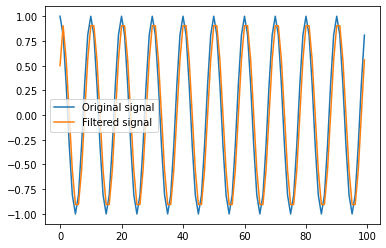

In [90]:
n = np.array(range(0,100))
nu = 0.1

x = np.cos(2*np.pi*nu*n)
b =[0.5,0.5]

plt.plot(x, label='Original signal')
plt.plot(signal.lfilter(b,1,x), label='Filtered signal')
plt.legend()

Numpy correlate:

50

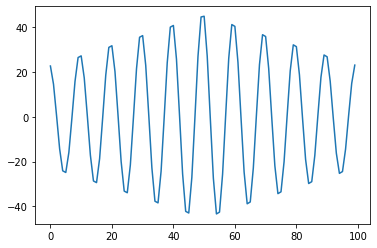

In [63]:
y1 = x
y2 = signal.lfilter(b,1,x)

corr = signal.correlate(y1, y2, 'same')

plt.plot(corr)

np.argmax(corr)

Computing power:

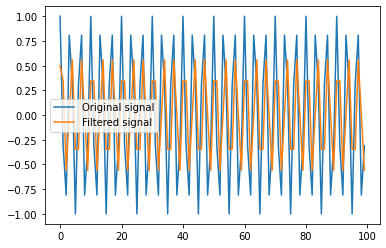

Estimated amplitude gain: 0.5878074769317104
Expected gain: 0.5882815482226453


In [110]:
n = np.array(range(0,100))
nu = 0.3
x = np.cos(2*np.pi*nu*n)
b =[0.5,0.5]

plt.plot(x, label='Original signal')
plt.plot(signal.lfilter(b,1,x), label='Filtered signal')
plt.legend()
plt.show()

w, h = signal.freqz(b,1)

n = np.array(range(0,10000)) # We can improve our estimate by increasing the number of periods
x = np.cos(2*np.pi*nu*n)

y1 = x
y2 = signal.lfilter(b,1,x)
print('Estimated amplitude gain:', np.sqrt(np.sum(np.power(y2,2))/np.sum(np.power(y1,2)))) # Ratio of energy over a large number of periods
print('Expected gain:', np.abs(h[int(2*nu*512)])) # Find the magnitude response at the specifc frequency

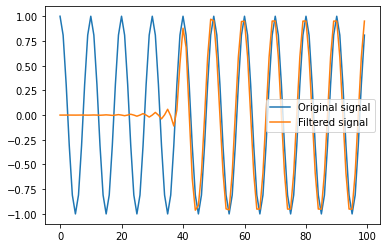

In [65]:
n = np.array(range(0,100))
nu = 0.1

x = np.cos(2*np.pi*nu*n)
b = signal.firwin(80, 0.5, window=('kaiser', 8))

plt.plot(x, label='Original signal')
plt.plot(signal.lfilter(b,1,x), label='Filtered signal')
plt.legend()